분류용 선형 모델
----
- 학습 속도가 빠르고, 예측도 빠르고.
- 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동
- 샘플에 비해 특성이 많을 때 잘 작동.
- 저차원 데이터셋에는 다른 방법이 더 좋다고 함.

1. 이진 분류
    - 이진 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 class를 구분하는 것.
    - $\hat{y} = w[0]*x[0] + w[1]*x[1] + \cdots + w[p]*x[q] + b> 0$ 을 사용.
    - 0보다 큰지, 작은지에 따라 class를 분류
    - 학습 알고리즘이 다양. 크게 2가지 분류
        - 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정
        - 사용할 수 있는 규제가 있는지, 있다면 어떠나 방식인지.
    - 참고.
        - 분류에서 잘못 분류된 결과를 직접 나타내는 0-1 손실 함수는 완전한 계단 함수이기 때문에 최적화에 사용할 수 없다고 함. 
        - 그래서 다른 함수 (surrogate loss function)을 써서 최적화를 한다고 함.
    
    - 예시.
        - 로지스틱 회귀 (logistic regreesion). 회귀라는 이름이 드어가기반 분류 알고리즘임.
        - 선형 서포트 벡터 머신 (linear support vector machine (SVC))
        - 둘 다 L2 규제를 사용함.

2. 다중 클래스 분류
    - 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원함. 
        - 로지스틱 회귀는 예외로, softmax 함수를 써서 다중 클래스 분류 알고리즘을 지원함.
        - scikit learn에서 돌릴 때는 그냥 이진 분류할 때 처럼 데이터를 넣으면 알아서 적용해주는 것 같다.
    - 이진 분류 알고리즘을 다중 분류 알고리즘을 확장해서 써야 함.
        - 확장을 위한 보편적인 기법이 일대다 (one-vs-rest (ovr) 또는 one-vs-all) 방법
        - 일대다 방식:
            - 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델 학습
            - 그 결과 클래스 수만큼 이진분류 모델이 만들어짐.
            - 이것을 가지고 예측을 할 때, 만들어진 모든 이진 분류기가 작동을 해서, 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택.
            
            - $i$번째 이진 분류기가, $w_i, b_i$ 값이 구해짐.
            - 하나의 값 x에 대해서, $w_i[0]*x[0] + w_i[1]*x[1] + \cdots + w_i[p]*x[p] + b_i$ 값이 가장 커지는 $i$ 이진 분류기에서의 class 로 할당된다고 함.
                - 앞의 이진분류기 수식 부분을 보면, 이 값이 0보다 크면 특정 class 라고 판명되지. 
                - 음? 이거 절대값으로 봐야 하는 것 아닌가?
    - 로지스틱 회귀를 사용한 다중 클래스 분류는 좀 다르다고 함. 다만 클래스 별 계수 벡터와 절편을 만드는 것은 같다고 함.
        - $Pr(Y_i=c) = \frac{e^{W_c\bullet X_i}}{\displaystyle\sum_{k=1}^{K}e^{W_k \bullet X_i}}$
        - $i$번째 데이터 포인트 $X_i$의 출력 $Y_i$가 class $c$ 일 확률이 $Pr(Y_i=c)$이다.
        - $K$는 전체 클래스 개수를 의미. 
        - 절편 $b$는 weights인 $W$에 포함되어 있는 것으로 본다.


d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


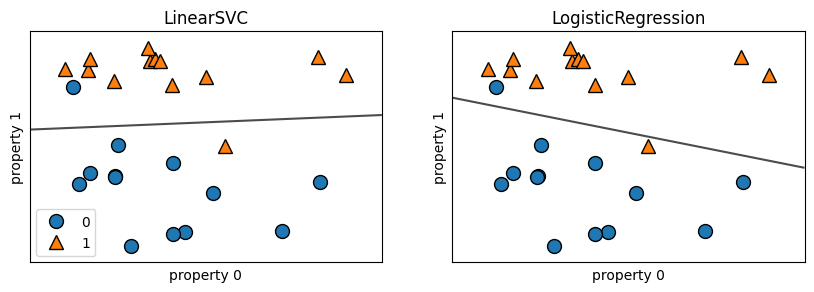

In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
#SVC는 support vector classifier 의 약자


X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf =  model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("property 0")
    ax.set_ylabel("property 1")
axes[0].legend()

Logistic regression과 SVM 의 규제의 강도를 결정하는 매개변수는 C

- C의 값이 높아지면 규제가 감소함.
    - 규제가 감소하면 현재 training data에만 좀 더 신경쓰게 되므로 overfitting이 발생하기 쉬워짐.
    - 아래 그림에서 C=1000을 보면, 선이 최대한 점을 다 잘 분류하려고 하는 것을 볼 수 있다. 

- C의 값이 낮아지면 규제가 증가함.
    - weights w가 0에 가까워지도록 유도함.

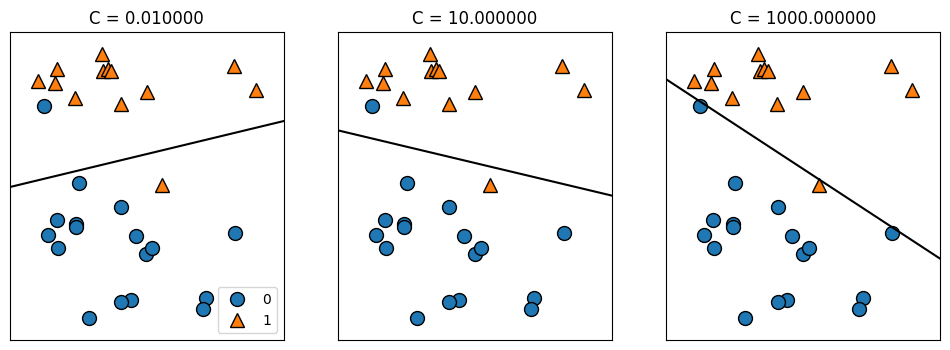

In [2]:
mglearn.plots.plot_linear_svc_regularization()

### 다중 클래스 분석. svm에 대해서.

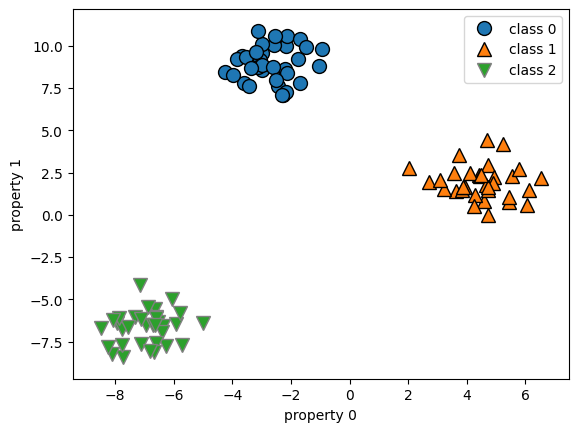

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.xlabel("property 0")
plt.ylabel("property 1")
plt.legend(["class 0", "class 1", "class 2"])

In [4]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ",linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


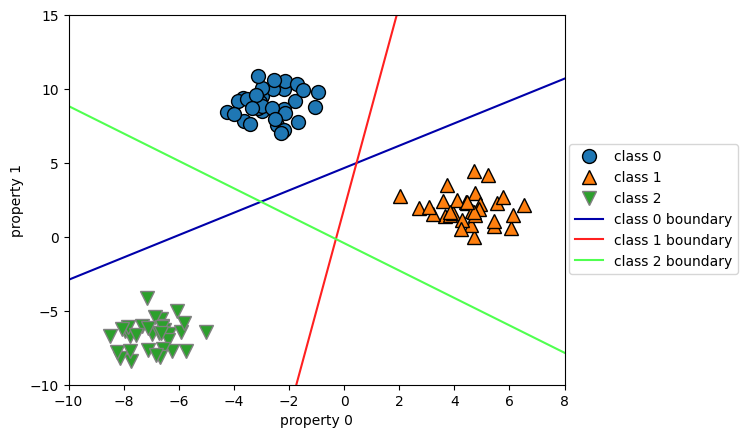

In [6]:
import numpy as np
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("property 0")
plt.ylabel("property 1")
plt.legend(["class 0", "class 1", "class 2", "class 0 boundary", "class 1 boundary", "class 2 boundary"], loc=(1.01, 0.3))

여기서 3개의 선이 만드는 중앙의 삼각형은 3 이진 분류기가 전부 rest 로 분류하는 것들.

여기에 data point 가 있을 경우에는 그 선형 결합 값이 가장 높은 class로 분류된다고 함.

아무래도, 이렇게 분류 boundary가 정해졌을 때, 어떤 data point가 하나의 분류기에서는 class X라고 분류하고, 나머지 분류기에서는 class rest 라고 분류하면, 그 data point는 이견 없이 class X일 것이다.

그러나 그 외의 경우, 위에서 언급한 선형 결합 값을 비교해서 분류하는 것 같다.

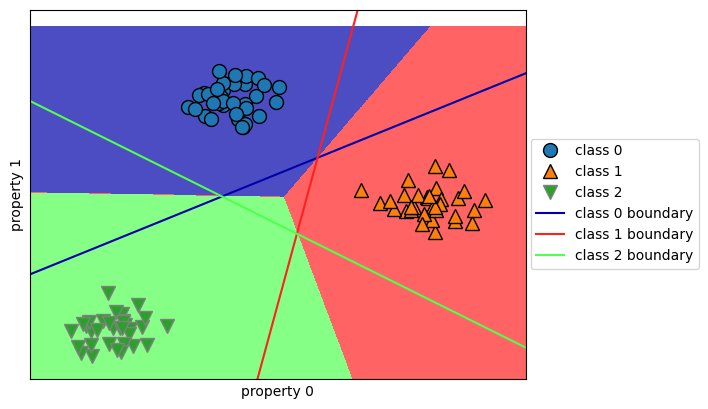

In [7]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("property 0")
plt.ylabel("property 1")
plt.legend(["class 0", "class 1", "class 2", "class 0 boundary", "class 1 boundary", "class 2 boundary"], loc=(1.01, 0.3))